# Árboles de Decisión
- **Árboles de Clasificación**: Clasificación de datos en _clases_ (problema de _clasificación_).
- **Árboles de Regresión**: Predicción de valores _continuos_ (problema de _regresión_).

#### En Sklearn

- Se dispone de la clase `DecisionTreeClassifier` para árboles de clasificación, y de `DecisionTreeRegressor` para árboles de regresión, ambas disponibles en `sklearn.tree`

## Motivación

- Los árboles de decisión se asemejan a la forma en que los seres humanos toman decisiones.
- Básicamente aprenden una jerarquía de preguntas en formato if/else que conllevan a una decisión.
    
<img width="600" src="img_1.png" />

## Construyendo un árbol de decisión

### Estrategia Top down (greedy)
1. Seleccionar un atributo para el nodo raíz y crear rama para cada valor posible del atributo
2. Dividir las instancias del dataset en subconjuntos, uno para cada rama que se extiende desde el nodo
3. Repetir de forma recursiva para cada rama, utilizando solo las instancias que llegan a ésta
4. Detenerse cuando todas las instancias del nodo sean de la misma clase

<a href="https://github.com/dccuchile/CC5205/blob/master/slides/Clase_7_clasi_algo.pdf">Referencia</a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import lec7_graphs as afx
from sklearn import tree
import matplotlib.pyplot as plt

plt.style.use("seaborn")

df = pd.read_csv('vertebrate.csv')
df.head()

,name,warm_blood,gives_birth,aquatic,aerial,has_legs,hibernates,class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


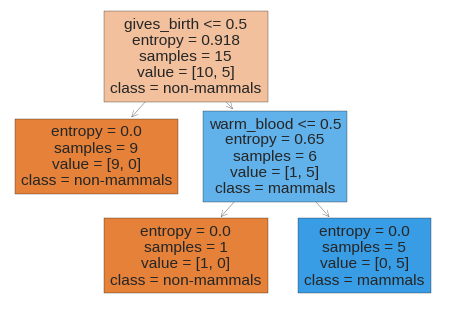

In [2]:
# recodificamos en mamiferos/no mamiferos
df['class'] = df['class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')

# guardamos los nombres de las clases en un nuevo objeto
store_y_labels = df['class'].unique()

# recodificamos de forma binaria
df['class'] = np.where(df['class'] == 'mammals', 1, 0)

# eliminamos atributos irrelevantes de la matriz de atributos
X_mat=df.drop(columns=['name', 'class'])

# Implementamos nuestra función y la guardamos en un nuevo objeto
dec_tree, _ = afx.demo_classfication_tree(X_mat, df['class'], store_y_labels)

# renderizamos el objeto
tree.plot_tree(dec_tree, feature_names = df.columns[1:-1], class_names=["non-mammals", "mammals"], filled = True);

In [6]:
df.head()

,name,warm_blood,gives_birth,aquatic,aerial,has_legs,hibernates,class
0,human,1,1,0,0,1,0,1
1,python,0,0,0,0,0,1,0
2,salmon,0,0,1,0,0,0,0
3,whale,1,1,1,0,0,0,1
4,frog,0,0,1,0,1,1,0


### Pureza 

- En el ejemplo anterior, todas las hojas _son puras_, ya que solo contienen datos de 1 clase. Pero podría darse un caso donde también queden hojas que contengan datos de _ambas clases_; La clase resultante para esa hoja sería la que tenga la mayor cantidad de casos.


- Existen distintos métodos para _medir la pureza_ de una hoja. Los más utilizados son **gini**, **entropía** y **ganancia de la información**. Son similares, y permiten _identificar qué nodos clasifican mejor_ entre una clase y otra, permitiendo así _identificar los mejores atributos_.


- En el ejemplo anterior se utilizó _entropía_, donde a mayor entropía se tiene una menor pureza, y con una entropía de 0 se tiene una hoja 100% pura.

## Hiperparámetros

El ajuste de estos hiperparámetros _ayuda a evitar a generar un árbol sobreajustado_; Los árboles tienden a "aprender demasiado bien" de los datos entregados, por lo que se deben _regularizar_ para poder ser más generalizables frente a predicciones para datos distintos a los utilizados durante el entrenamiento.

### Máximo de Profundidad
- Hasta cuándo puede crecer un árbol.
- Es decir, _cuántos "niveles" hacia abajo_ puede tener el árbol. 
- A _mayor profundidad permitida, mayor sobreajuste_ (menor generalización).
- En `sklearn`, corresponde al hiperparámetro `max_depth.`


### Cantidad de atributos
- Cuántos atributos debo considerar en un árbol.
- A _mayor cantidad de atributos, mayor sobreajuste_ (menor generalización).
- En `sklearn`, corresponde al hiperparámetro `max_features`.
    - Si es `None`, entonces `max_features=n_features`


### Mínimo de muestras en un nodo particionable
- Con cuántas observaciones podemos seguir subdividiendo.
- Es decir, cuánto es el mínimo de datos que debe tener un nodo para volver a generar nodos.
- A _menor cantidad de datos permitidos, mayor sobreajuste_ (menor generalización).
- En `sklearn`, corresponde al hiperparámetro `min_sample_split`.
    - Puede indicarse como número de muestras con un valor `int`, o como una fracción de datos con un valor `float`.


### Mínimo de muestras en un nodo terminal:
- Con cuántas observaciones paramos de subdividir.
- Es decir, determina cuándo termina el proceso de búsqueda en un nodo, transformándolo en hoja, según la cantidad de muestras que posee.
    - Por tanto, _permite que una hoja no sea totalmente pura_.
- A _menor cantidad de datos permitidos en una hoja, mayor sobreajuste_ (menor generalización).
- En `sklearn`, corresponde al hiperparámetro `min_sample_leaf`.
    - Puede indicarse como número de muestras con un valor `int`, o como una fracción de datos con un valor `float`.
    
_**Revisar Lectura 3 para ver la implementación y el efecto de utilizar distintos valores para estos hiperparámetros en forma independiente**_.

In [3]:
print("Hiperparámetros del modelo entrenado previamente:")
dec_tree.get_params()

Hiperparámetros del modelo entrenado previamente:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Alternativa: Hiperparámetro ccp_alpha
- Los hiperparámetros revisados anteriormente contrarestan el overfitting _"evitando que el árbol crezca demasiado"_.
- Otra alternativa es regularizar el árbol mediante su _"poda"_. Es decir, en lugar de evitar que el árbol crezca, simplemente _"cortar ramas"_ una vez que se ha generado el árbol.
    - Esto es posible en versiones actuales de `sklearn` mediante el hiperparámetro `ccp_alpha`.
    - A mayor valor de `ccp_alpha`, mayor poda de nodos (mayor generalización).
    - Usualmente se usa valores pequeños, cercanos a 0.
    - El tiempo de entrenamiento de 1 modelo es mayor, con el beneficio que el proceso de búsqueda de grilla en total puede ser menor ya que solo se busca valores de 1 hiperparámetro.
    
<a href="https://qu4nt.github.io/sklearn-doc-es/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py">Documentación de sklearn (versión en español por qu4nt)</a>

## Importancia relativa

- Miden la influencia de un atributo en la decisión del árbol.
- Atributos con una mayor carga se posicionarán antes en el proceso de decisión.
- Cargas altas significan que la división fue más pura.
- Cargas bajas no significan que el atributo sea irrelevante: Pueden significar que el modelo no evaluó bien en los atributos.

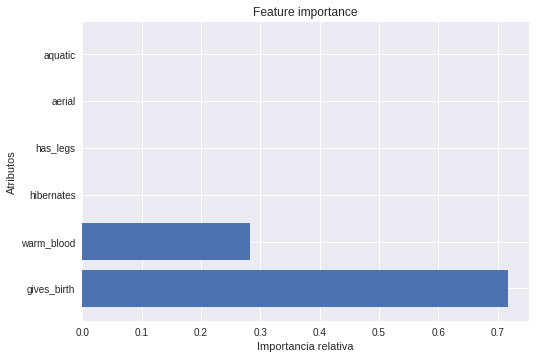

In [4]:
afx.plot_importance(dec_tree, X_mat.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');